In [1]:
import numpy as np
np.random.seed(42)
from train_fashion_10 import train as fashion_train
from train_cifar_10 import train as cifar10_train


2025-11-24 15:47:38.987494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Fashion-MNIST Run

W&B disabled.


Epoch 5/100, Loss: 0.3754, Train Accuracy: 0.8839
Val Loss: 0.3748, Val Accuracy: 0.8682
Epoch 10/100, Loss: 0.3154, Train Accuracy: 0.9107
Val Loss: 0.3473, Val Accuracy: 0.8753
Epoch 15/100, Loss: 0.2819, Train Accuracy: 0.9107
Val Loss: 0.3317, Val Accuracy: 0.8792
Epoch 20/100, Loss: 0.2551, Train Accuracy: 0.9196
Val Loss: 0.3091, Val Accuracy: 0.8910
Epoch 25/100, Loss: 0.2333, Train Accuracy: 0.9375
Val Loss: 0.3120, Val Accuracy: 0.8893
Epoch 30/100, Loss: 0.2160, Train Accuracy: 0.9375
Val Loss: 0.3080, Val Accuracy: 0.8903
Early stopping triggered at epoch 33. Best validation loss: 0.2990 (epoch 28)
Test accuracy: 0.8832


(<model_fashion_10.FashionFFNN at 0x7f1f18999520>, np.float64(0.8832))

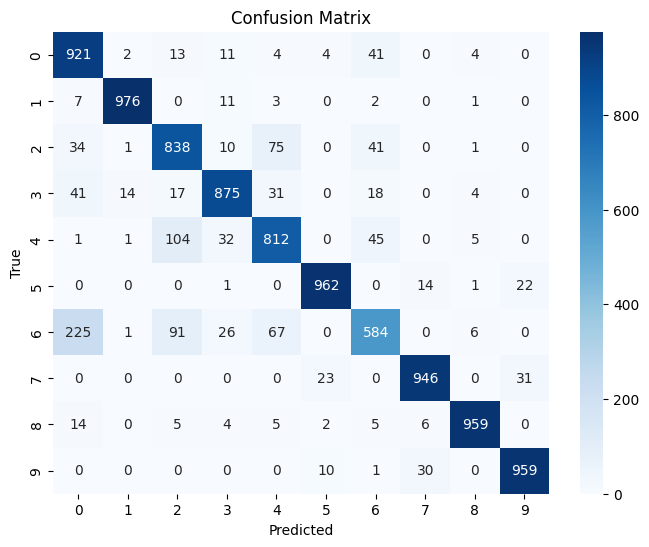

In [2]:
from types import SimpleNamespace
import os
os.environ["WANDB_MODE"] = "disabled"
!wandb disabled

def train_notebook(config):
    """
    Notebook-friendly wrapper for training.
    `config` is a dictionary of parameters, similar to your params dict.
    """
    # Convert dict to a SimpleNamespace to mimic argparse.Namespace
    args = SimpleNamespace(**config)
    params['hidden_layers'] = ','.join(map(str, params['hidden_layers']))
#     # Convert hidden_layers from string to list if necessary
#     if isinstance(args.hidden_layers, str):
#         args.hidden_layers = [int(x.strip()) for x in args.hidden_layers.split(',')]
    
    return fashion_train(args=args)

params = {
        'num_epochs': 100,
        'dropout_rate': 0,
        'learning_rate': 2.654083941177282e-5,
        'l2_coeff': 5.330196217596967e-5,
        'hidden_layers': "256,128",   # can be string or list
        'weight_init': 'random',
        'optimizer': 'adam',
        'activation': 'relu',
        'batch_size': 128,
        'input_size': 784,
        'loss': 'cross_entropy',
        'batch_norm': False,
        'standardize': False,
        'use_subset': False,
        'subset_ratio': 0.25,
        'project_name': 'Deep_learning_project',
        'experiment_name': 'Fashion_Notebook_Run',
        'no_wandb': False,
        'no_plots': False,
        'save_plots': 'Plots'
        }


train_notebook(params)